# Linear Regression Model - Bike Sharing Assignment

## Problem Statement
* A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
_______________________________________________________________________________________________________________________________
* A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
* In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits


* They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:-

    * Which variables are significant in predicting the demand for shared bikes.
    * How well those variables describe the bike demands
    
    
* Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
* We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv("Bike sharing dataset.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [4]:
# Check how many rows and columns in dataframe
bike.shape

(730, 16)

In [5]:
# Check null values in dataframe
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in dataframe

In [6]:
# Check datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check dataset using describe() for overview of all columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# We can see that the column names are in short form. So rename it for better understanding.
bike.rename(columns = {'yr':'Year','mnth':'Month','weathersit':'WeatherSituation','hum':'Humidity','cnt':'Count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,WeatherSituation,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


* Chnage the categorical variable values to actual name according to provided in data dictionary.
* Here we will change categorical variable season, month, weathersit, weekday

In [9]:
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

In [10]:
bike['Month']=bike.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',
                              7:'July',8:'Aug',9:'Sep',10:'Oct', 11:'Nov',12:'Dec'})

In [11]:
bike['WeatherSituation']=bike.WeatherSituation.map({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'HeavyRain + Snow'})

In [12]:
bike['weekday']=bike.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [13]:
bike.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,WeatherSituation,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


* Here, we changed categorical variable value for season, month, weathersit, and weekday.
1. Season column mapped as:- 1:spring, 2:summer, 3:fall, 4:winter.
2. Month column mapped as:-
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
3. WeatherSituation column as:-1: 'Clear',  2:'Mist + Cloudy',  3:'Light Snow',  4:'HeavyRain + Snow'
4. weekday column as:- 0:'Sun',  1:'Mon',  2:'Tue',  3:'Wed',  4:'Thu',  5:'Fri',  6:'Sat'

## Step 2: Visualising the Data

Let's now visualise our data using `matplotlib` and `seaborn`. This is the most import step - **understanding the data**. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Count`.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

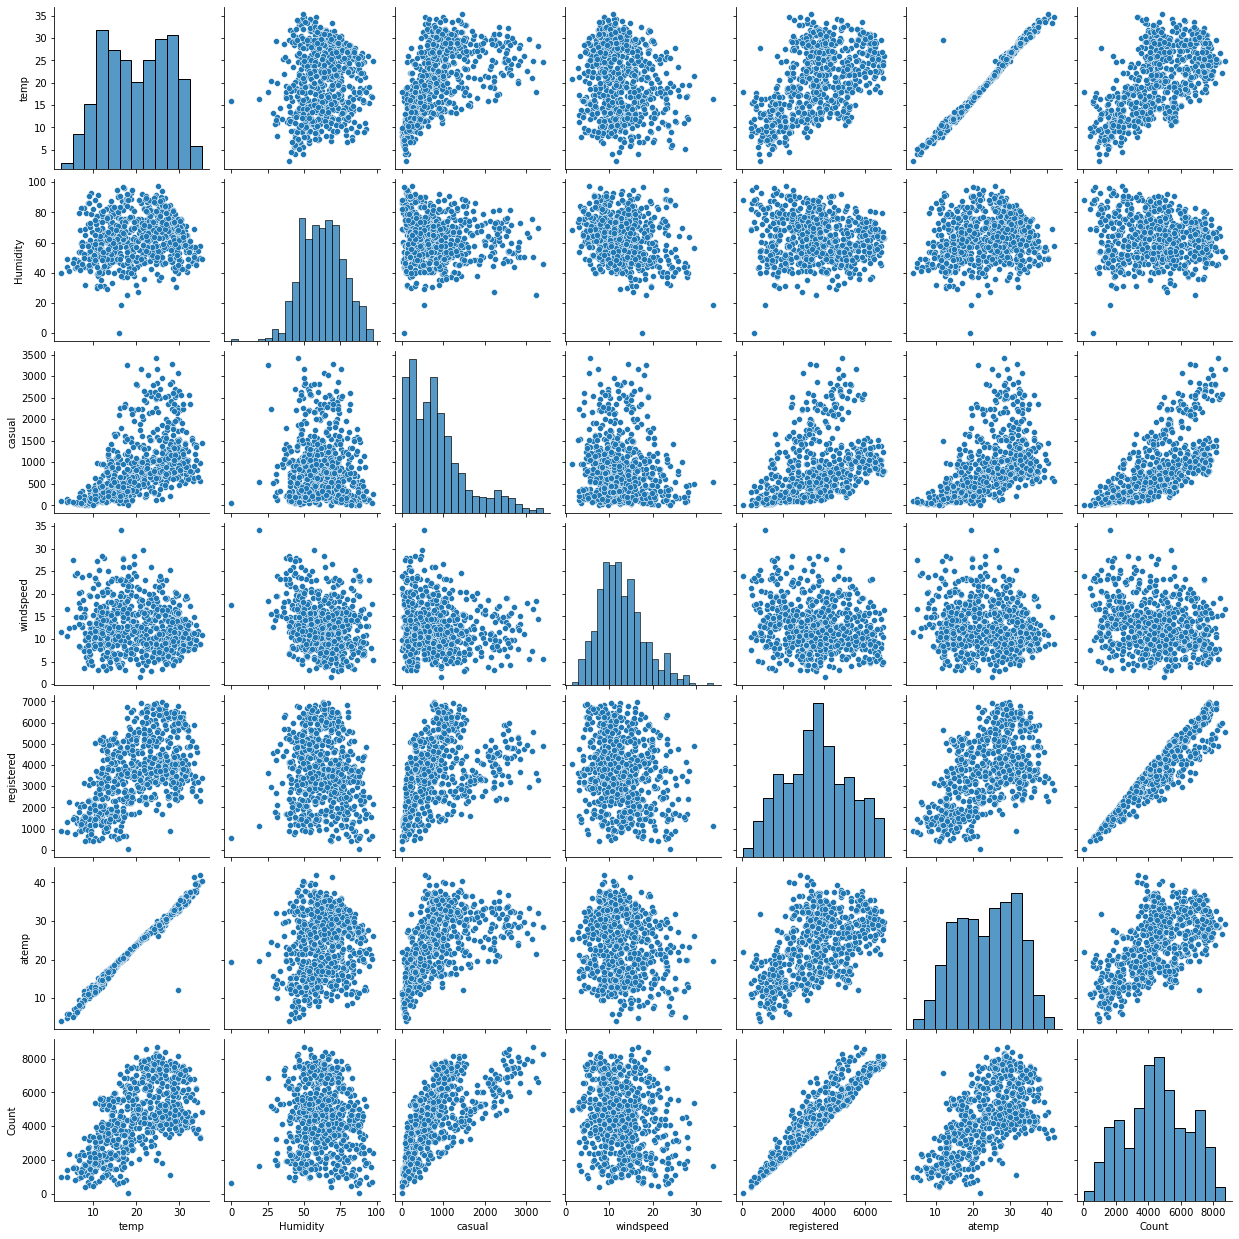

In [15]:
# Here we took all the numeric variable except instant as it is index number.
sns.pairplot(bike, vars=["temp", "Humidity",'casual','windspeed','registered','atemp','Count'])
plt.show()

* Here, We can see that 
1. Bike rental counts have a positive correlation with temp and atemp and also at higher temperatures the count is more and vice-versa
2. Bike rental counts are high at high humidity levels.
3. Bike rental counts are more at low windspeed and less at high windspeed.

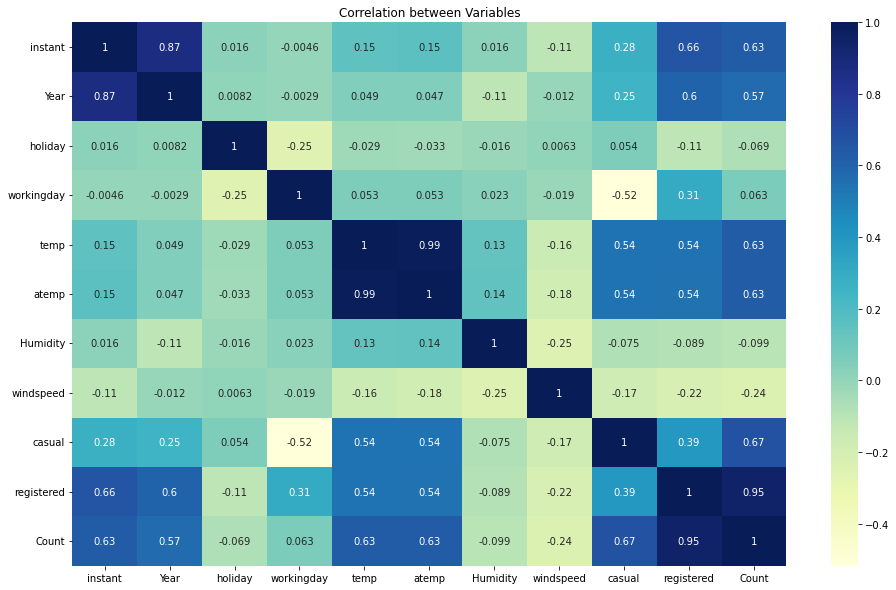

In [16]:
# We can see from the above graphs that temp and atemp have a linear relationship
# We can check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation between Variables")
plt.show()

* We can see that the variables 'temp' and 'atemp' have a high correlation value of 0.99 which is almost 1. They are highly correlated to each other , therefore we need to drop one of them .
* Also, We can see that temp, atemp, casual,registered variables are correlated to 'count' variable
* We can also see some other variables are also most correlated.

In [17]:
# drop atemp column as it is highly correlated to temp coloumn otherwise it will lead to multicollinearity
bike=bike.drop(['atemp'], axis=1)
bike.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,WeatherSituation,temp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


* We can also drop some unnecessary columns like 
1. instant - instant is an index column so we drop it
2. dteday - we can see column dteday and yr month are having same data so we can drop dteday
3. casual and registered - we know that casual + registered=count and count is our target variable so we can drop casual and registered columns

In [18]:
bike=bike.drop(['instant','dteday','casual', 'registered'], axis=1)
bike.head()

,season,Year,Month,holiday,weekday,workingday,WeatherSituation,temp,Humidity,windspeed,Count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Step 3: Data Preparation

* Creating Dummy Variables for the Categorical variables `Month, season, WeatherSituation, and weekday`. We need to convert these categorical variable into integer. 
For this, we will use something called `dummy variables`.

In [19]:
# Get the dummy variables for the features Month, season, WeatherSituation, and weekday and store it in a new variable
months=pd.get_dummies(bike.Month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
Weather_situation=pd.get_dummies(bike.WeatherSituation,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [20]:
# Add the new variables to the original bike dataframe

bike = pd.concat([bike, months, weekdays, Weather_situation, seasons], axis = 1)

In [21]:
# Check what the dataset 'status' looks like
bike.head()

,season,Year,Month,holiday,weekday,workingday,WeatherSituation,temp,Humidity,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [22]:
# Drop Month, season, WeatherSituation, and weekday as we have created the dummies for it
bike.drop(['season','Month','weekday','WeatherSituation'], axis = 1, inplace = True)
bike.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [23]:
# Checking the shape of dataframe after dropping the above variables
bike.shape

(730, 29)

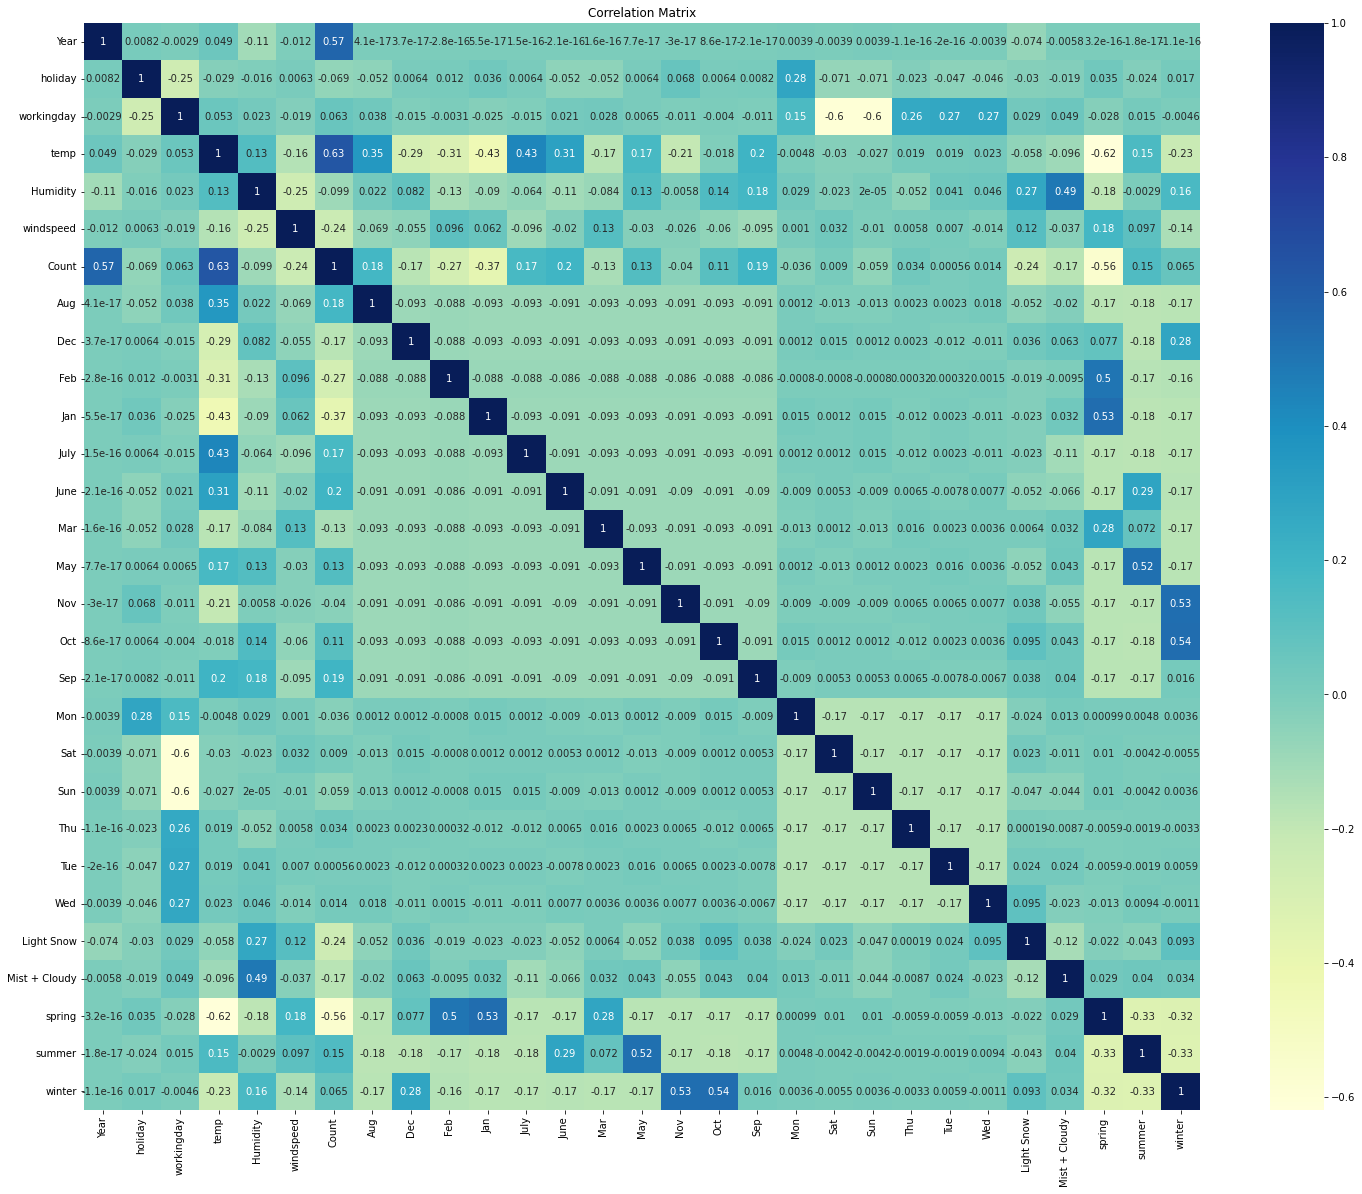

In [24]:
# We can check correlation between variables again as dataframe is changed and we can get better insights of dataset now
plt.figure(figsize = (25, 20))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

* From the heatmap we can see all variable which are multicollinear and which variable have high collinearity with the target variable. 
* Also, Temperature,Summer season,June to october months are in good correlation with the 'count' variable & which mean we get more number of bike rentals.
* We can use this heat map while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select and eliminate from the model.

## Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.
#### Train-Test Split
We need to split our variable into training and testing sets. We'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. We will keep 70% of the data in our train dataset and the rest 30% in our test dataset.

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
# Check the shape of train and test dataset
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


In [27]:
bike_train.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [28]:
bike_test.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Step 5: Feature scaling
As it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale, so we will do rescaling of the features. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [29]:
# Min-Max scaling 
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Apply scaler() to all the numeric columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()

num_vars=['temp','Humidity','windspeed','Count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [31]:
bike_train.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [32]:
bike_train.describe()

,Year,holiday,workingday,temp,Humidity,windspeed,Count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


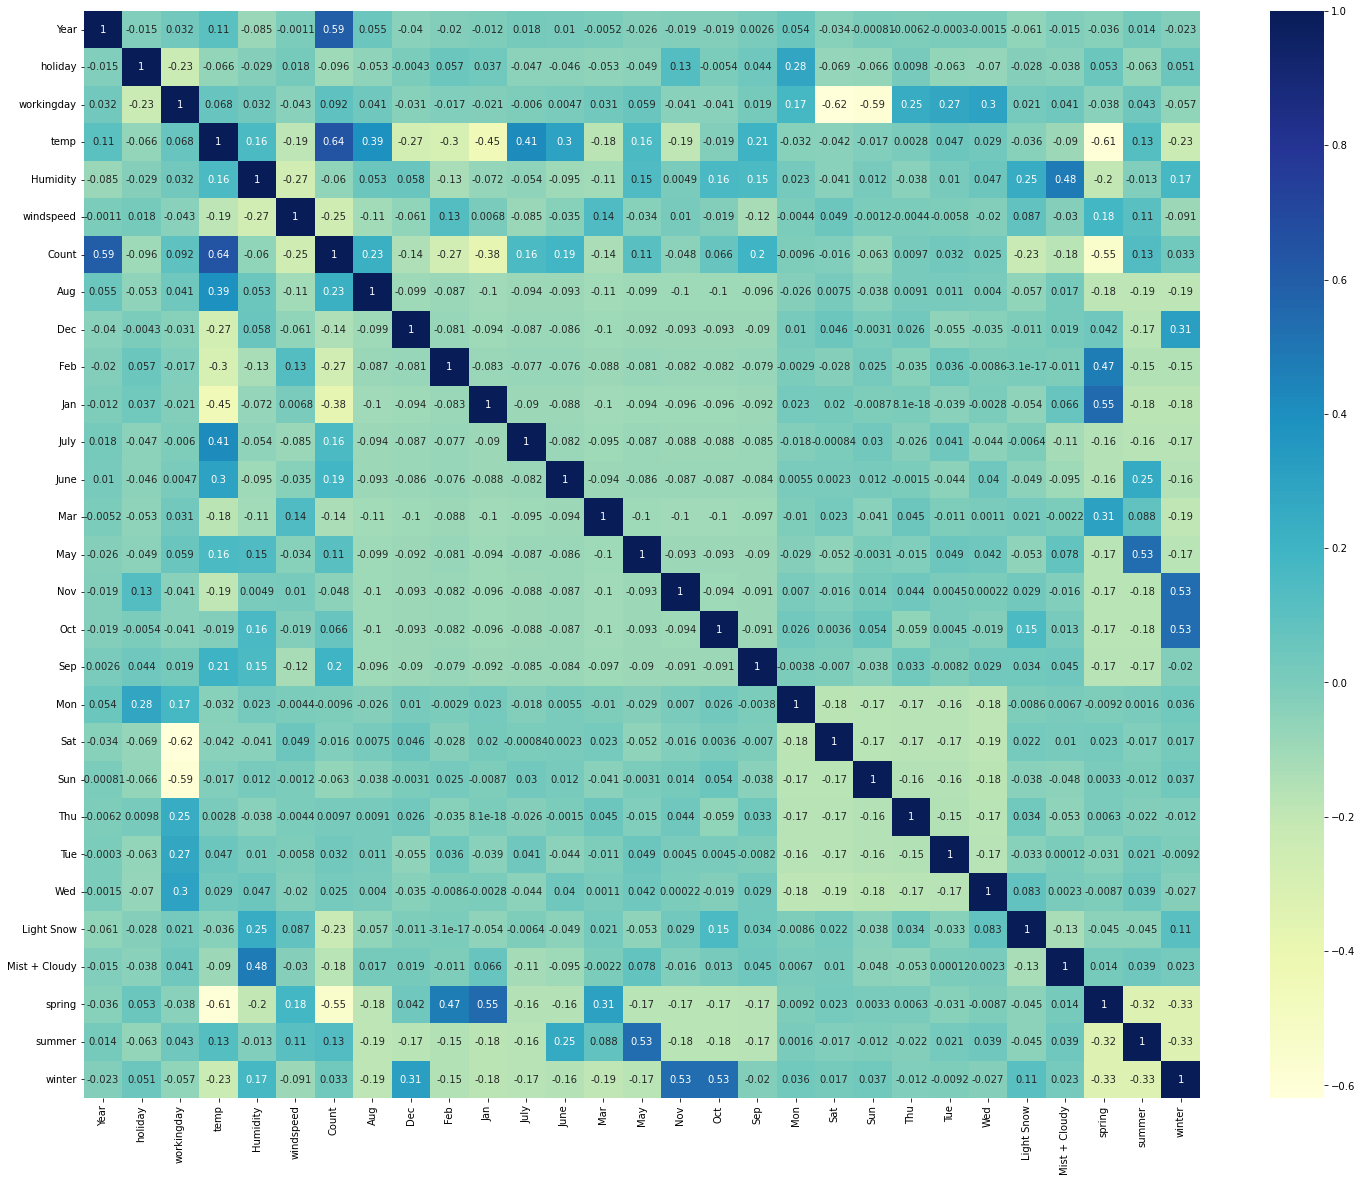

In [33]:
# We can check the correlation coefficients to see which variables are highly correlated as all variables have value between 0 and 1

plt.figure(figsize = (25, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

* We can see from the heatmap that temp, year is correlated to the 'count' variable and in August, September months we can see the counts are little high.

### Dividing into X and Y sets for the model building

In [34]:
#Divide the data into X_train and y_train
y_train = bike_train.pop('Count')
X_train = bike_train

## Step 6: Building a linear model

We will use the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

* rfe_support_ : tells whether RFE selected the variable or not
* rfe.ranking_ : tells the next best variable to be selected and ranks accordingly , The numbers beside the variables indicate the importance of that variable.

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [39]:
# Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          2.31e-191
Time:                        23:40:27   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

In [44]:
# January have high P-value i.e. 0.48

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [45]:
# We will drop the constant that is term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.48
13,summer,2.84
11,Mist + Cloudy,2.29
0,Year,2.09
9,Sat,1.98


### Rebuilding model 1 - Drop column Jan

In [48]:
# As January has high P-value we can drop it.
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [49]:
# Again build the model without "Jan"
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.13e-191
Time:                        23:40:27   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2394      0.036      6.696

In [50]:
# We will drop the constant that is term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [51]:
# Again calculate VIF
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.44
12,summer,2.83
10,Mist + Cloudy,2.28
0,Year,2.08
8,Sat,1.97


### Rebuilding model 2 -  Drop column Humidity

In [52]:
# As Humidity have very high VIF we can drop these column.
X_train_new2 = X_train_lm1.drop(["Humidity"], axis = 1)

In [53]:
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          5.73e-189
Time:                        23:40:27   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1577      0.031      5.134

In [54]:
# holiday have high P-value i.e. 0.038

In [55]:
# We will drop the constant that is term B0
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [56]:
# Calculate VIF for model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.32
0,Year,2.07
12,winter,1.99
7,Sat,1.96
5,July,1.58
9,Mist + Cloudy,1.56


### Rebuilding model 3 - Drop column holiday

In [57]:
# As holiday has high P-value and low VIF we can drop it.
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [58]:
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          3.28e-189
Time:                        23:40:27   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1493      0.031      4.886

In [59]:
# We will drop the constant that is term B0
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [60]:
# Calculate VIF
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
9,spring,2.38
10,summer,2.31
0,Year,2.07
11,winter,1.92
6,Sat,1.83
4,July,1.58
8,Mist + Cloudy,1.56


### Rebuilding model 4 - Drop column windspeed

In [61]:
# We can see that windspeed have high VIF and negative correlation with count. Lets drop it
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [62]:
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          9.28e-183
Time:                        23:40:27   Log-Likelihood:                 488.32
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     498   BIC:                            -901.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.251

In [63]:
# We will drop the constant that is term B0
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [64]:
# Calculate VIF
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.03
1,workingday,4.63
0,Year,2.07
9,summer,2.05
5,Sat,1.81
8,spring,1.78
10,winter,1.74
3,July,1.58
7,Mist + Cloudy,1.56
4,Sep,1.34


### Rebuilding model 5 - Drop column July

In [65]:
# We can drop July column because of VIF and P-value.
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [66]:
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.55e-182
Time:                        23:40:27   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0901      0.030      2.965

In [67]:
# Calculate VIF
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
1,workingday,4.63
0,Year,2.07
4,Sat,1.81
8,summer,1.74
7,spring,1.70
9,winter,1.59
6,Mist + Cloudy,1.56
3,Sep,1.23
5,Light Snow,1.07


##### We can see that all VIF and P-value are in acceptable range. Now we can do our predictions using this lm5 model.

- If VIF is greater than 10, It means high multicollinearity. In our case, all the values are less than 5, so we can do our regression test.


- A low p-value (< 0.05) indicates that you can reject the null hypothesis. The p-value for each term tests the null hypothesis that the coefficient is equal to zero which means there is no significance between dependent and independent variable.


- R-squared measures the strength of the relationship between our model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.826 i.e. 82.6% which is good model for regression.


- We will now see the F-Statistic value . F-Statistics is used for testing the overall significance of the Model. 
  High value for the F-Statistics means the model is more significant and vice-versa.
  `F-statistic: 237.5`       `Prob (F-statistic): 1.55e-182`
   The F-Statistics value of 237.5 (greater than 1) and the Prob(F-statistic) of '~0.000'(very low) states that the overall model is significant.


- Also the adjusted R-squared penalise the model for the number of predictors in the model. We have adjusted R-squared around 0.82 or 82% which is also good for regression model.


##### Finally we can say our model for regression is lm5 which is obtained by dropping January, windspeed, holiday, July and humidity variables by RFE process.

## Step 7: Residual Analysis of the train data
So, now we have to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [68]:
X_train_lm5.head()

,const,Year,workingday,temp,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
653,1.0,1,1,0.509887,0,0,0,0,0,0,1
576,1.0,1,1,0.815169,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0,1,0,1,0,1,0


In [69]:
# y train predicted
y_train_pred = lm5.predict(X_train_lm5)

In [70]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

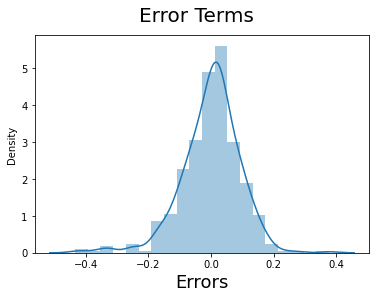

In [71]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

* The error terms are normally distributed as per requirement

## Step 8: Making predictions using the final model

#### Applying the scaling on the test sets

In [72]:
num_vars=['temp','Humidity','windspeed','Count']     # list of numeric variables

bike_test[num_vars] = scaler.transform(bike_test[num_vars])    #Fit on data
bike_test.head()

,Year,holiday,workingday,temp,Humidity,windspeed,Count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


#### Dividing into X_test and y_test

In [73]:
y_test = bike_test.pop('Count')
X_test = bike_test

In [74]:
# Check the dataframe X_test
X_test.describe()

,Year,holiday,workingday,temp,Humidity,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.059361,0.086758,0.100457,0.077626,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.236840,0.282125,0.301297,0.268194,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Year,workingday,temp,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
184,1.0,0,0,0.831783,0,0,0,1,0,0,0
535,1.0,1,1,0.901354,0,0,0,0,0,1,0
299,1.0,0,1,0.511964,0,0,0,1,0,0,1
221,1.0,0,1,0.881625,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0,0,0,0,0,1,0


In [76]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test dataset

In [77]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8110959585457425

In [78]:
X_test_new.shape     # shape of test data for sample size and number of variable

(219, 10)

In [79]:
# Adjuste R-Squared calculation
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
n = X_test_new1.shape[0]      # n is number of rows in X_test_new

p = X_test_new1.shape[1]
#n =sample size , p = number of independent variables
Adj_r2=1-(1-r2)*(n-1)/(n-p-1)
print(Adj_r2)

0.801057579531265


## Step 9: Model Evaluation

<Figure size 432x288 with 0 Axes>

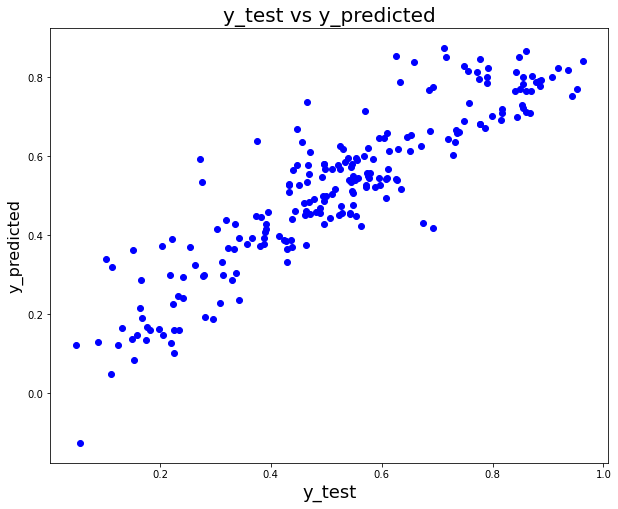

In [80]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color='blue')
plt.title('y_test vs y_predicted', fontsize=20)         # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_predicted', fontsize=16)                          # Y-label
plt.show()

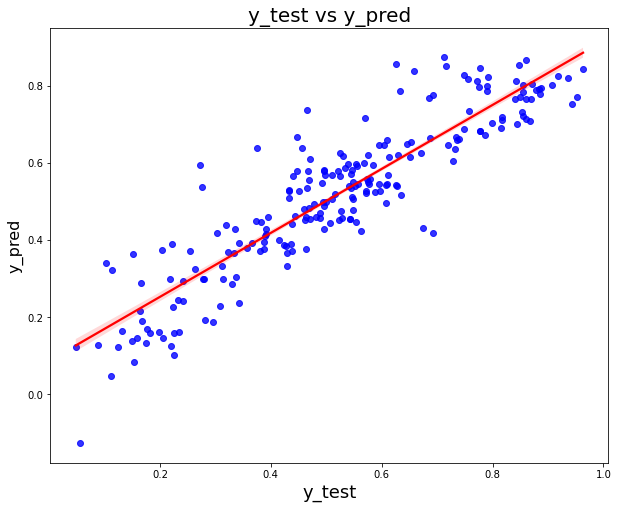

In [81]:
#Regression plot
plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [82]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.55e-182
Time:                        23:40:30   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0901      0.030      2.965


We can see that the equation of our best fitted line is:

$ count=         0.0901 + 0.4918 \times temp+   0.0915   \times September + 0.0647 \times Saturday +0.0516 \times summer + 0.0984 \times winter + 0.2333 \times Year + 0.0568 \times working day   - 0.03051 \times light snow - 0.0800 \times mist cloudy -0.0647 \times spring $


From the regression model above , we have the following variables and their coefficients which are significant in predicting the demand for shared bikes:

const         = 0.0901      
Year          = 0.2333    
workingday    = 0.0568    
temp          = 0.4918      
Sep           = 0.0915      
Sat           = 0.0647      
Light Snow    = -0.3051      
Mist + Cloudy = -0.0800      
spring        = -0.0647      
summer        = 0.0516      
winter        = 0.0984

## We can see the demand for bikes depends mainly on below variables:

#### year, working day, temp, month, day, Weather situation, season

##### Demands increases in the month of  septembe  and also 2019 year have more rental count than 2018
##### Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy

In [83]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07307280864355646
MSE: 0.008972150111724591
RMSE: 0.0947214342782276


* Assumptions of Linear Regression:
    - The error terms are normally distributed.
    - The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
    - The predicted values have linear relationship with the actual values.**

* Comparison between the results on Train and Test datasets:
- R-squared Value:

    - Train set : 82.6%
    - Test set : 81.1%

- Adj R-squared Value:

    - Train set : 82.3%
    - Test set : 80.1%

* As we can see that the difference between the R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model .

* As we can see that the difference between the Adj R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model .

##### Important outcome of analysis:-
- We can see that temperature variable is having the highest coefficient 0.4918, which means if the temperature increases by one unit the number of bike rentals increases by 0.4914 units.
- We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
- We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

##### Predictions:
- Temperature could be a prime factor for making decision for the comapany.
- We can see demand for bikes was more in 2019 than 2018 so year is also important variable.
- Working days as they have good influence on bike rentals. So it would be great to provide offers to the working individuals.
* The top features contributing significantly towards explaining the demand of the shared bikes are :-
    - temperature
    - year
    - winter
    - workingday